<a href="https://colab.research.google.com/github/MarkusNeusinger/defichain-data-toolkit/blob/main/notebooks/daily_dfi_burn_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily DFI Burn/Emission, 7 day moving avg

In [9]:
import os, sys
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# import defichain-data-toolkit utils
if os.path.isdir('defichain-data-toolkit'): os.system('rm -rf defichain-data-toolkit')
!git clone https://github.com/MarkusNeusinger/defichain-data-toolkit.git
sys.path.insert(1, 'defichain-data-toolkit')

from utils import fetch_history

print(f"\nNotebook last run: {datetime.utcnow()}")

Cloning into 'defichain-data-toolkit'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 46 (delta 15), reused 26 (delta 7), pack-reused 0
Receiving objects: 100% (46/46), 898.85 KiB | 16.34 MiB/s, done.
Resolving deltas: 100% (15/15), done.

Notebook last run: 2023-09-20 23:17:51.695841


In [10]:
# fetching data, last 90 days
df = fetch_history('daily', ['Height', 'EmissionTotal', 'BurnedTotal'],
                   from_timestamp=(datetime.utcnow() - timedelta(days=90)).strftime("%Y-%m-%dT%H:%M:%S"))
df.sort_values('datetime_utc', ascending=True, inplace=True)
df.head()

100%|██████████| 3/3 [00:00<00:00, 11.52it/s]


,datetime_utc,emissiontotal,height,burnedtotal
0,2023-06-23,136.626606,3.045378e+06,3.176473e+08
1,2023-06-24,136.626606,3.048301e+06,3.176473e+08
2,2023-06-25,135.819112,3.051180e+06,3.176473e+08
3,2023-06-26,134.361336,3.054095e+06,3.176474e+08
4,2023-06-27,134.361336,3.056944e+06,3.176490e+08


In [11]:
# calculate 1day diff
df['time_diff'] = df['datetime_utc'].diff().dt.total_seconds()
df['height_diff'] = df['height'].diff()
df['burn_diff'] = df['burnedtotal'].diff()

# drop rows with diff > 1day or nan
df = df[df['time_diff'] == 86400].copy()
df['emission'] = df['emissiontotal'] * df['height_diff']
df['burn'] = df['burn_diff']

# calculate 7 day moving avg
df['burn_7day_avg'] = df['burn'].rolling(window=7).mean()
df['emission_7day_avg'] = df['emission'].rolling(window=7).mean()

# drop nan
df.dropna(inplace=True)

df.tail()

,datetime_utc,emissiontotal,height,burnedtotal,time_diff,height_diff,burn_diff,emission,burn,burn_7day_avg,emission_7day_avg
85,2023-09-16,119.521922,3.289773e+06,3.177318e+08,86400.0,2907.912688,30.536526,347559.314513,30.536526,2587.229696,347238.995113
86,2023-09-17,119.521922,3.292675e+06,3.177319e+08,86400.0,2902.110367,28.464763,346865.809952,28.464763,2582.324889,346346.861010
87,2023-09-18,119.521922,3.295582e+06,3.177503e+08,86400.0,2906.973990,18375.971268,347447.119566,18375.971268,3559.066835,346204.934152
88,2023-09-19,119.521922,3.298570e+06,3.177534e+08,86400.0,2988.092581,3193.514616,357142.569512,3193.514616,3099.342783,346954.997696
89,2023-09-20,119.521922,3.301364e+06,3.177535e+08,86400.0,2794.205656,27.052077,333968.831560,27.052077,3100.922798,345300.117734


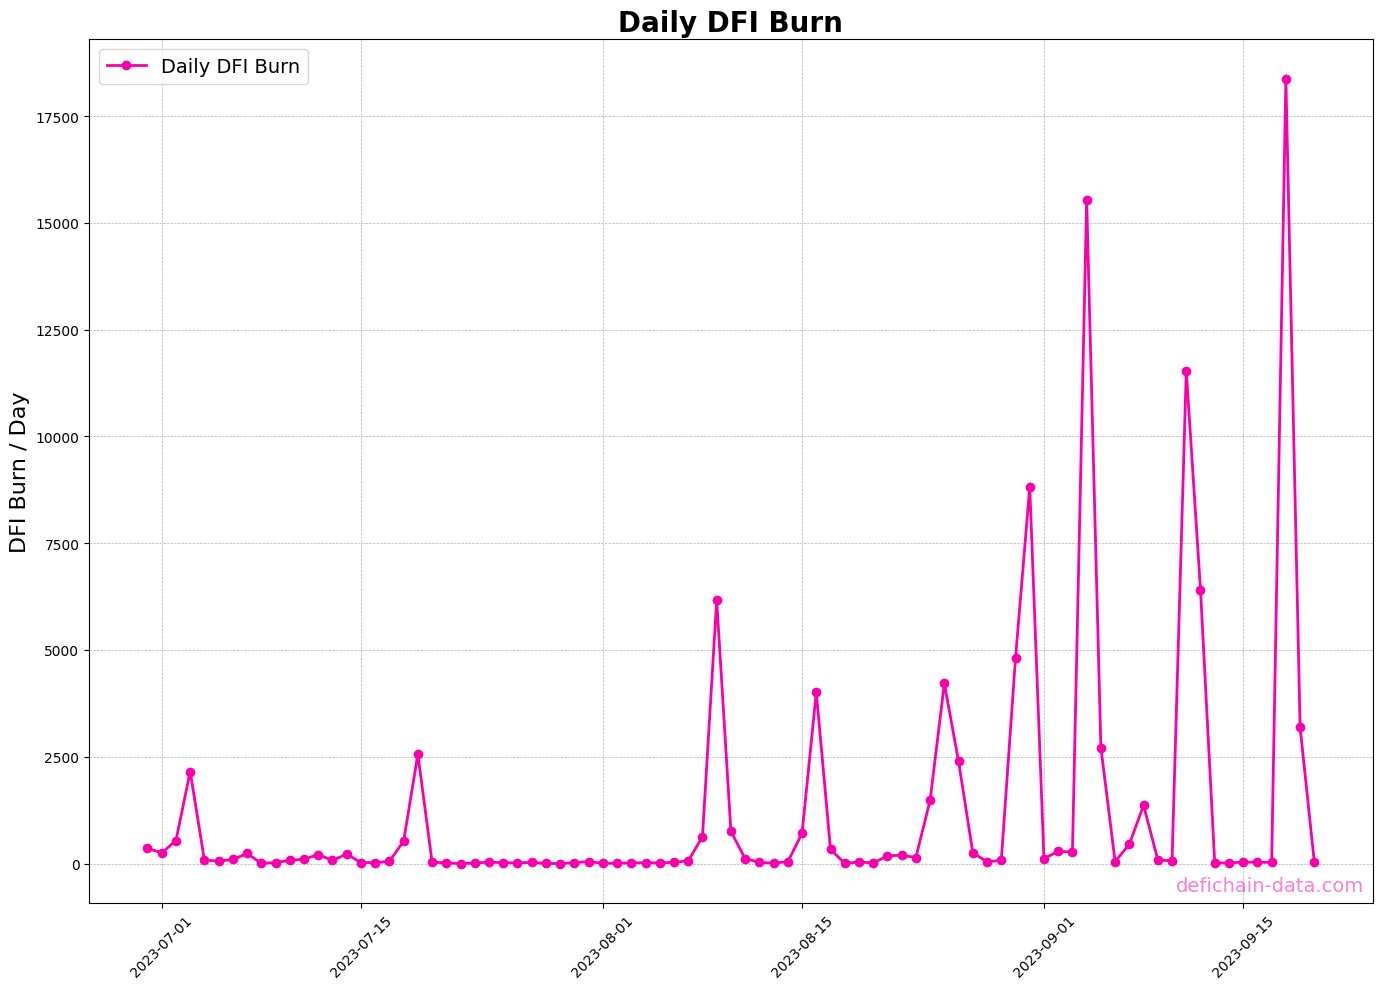

In [12]:
# Plotting Daily burn
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['burn'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Burn')

axs.set_title('Daily DFI Burn', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Burn / Day', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Burn.png', dpi=300)
plt.show()

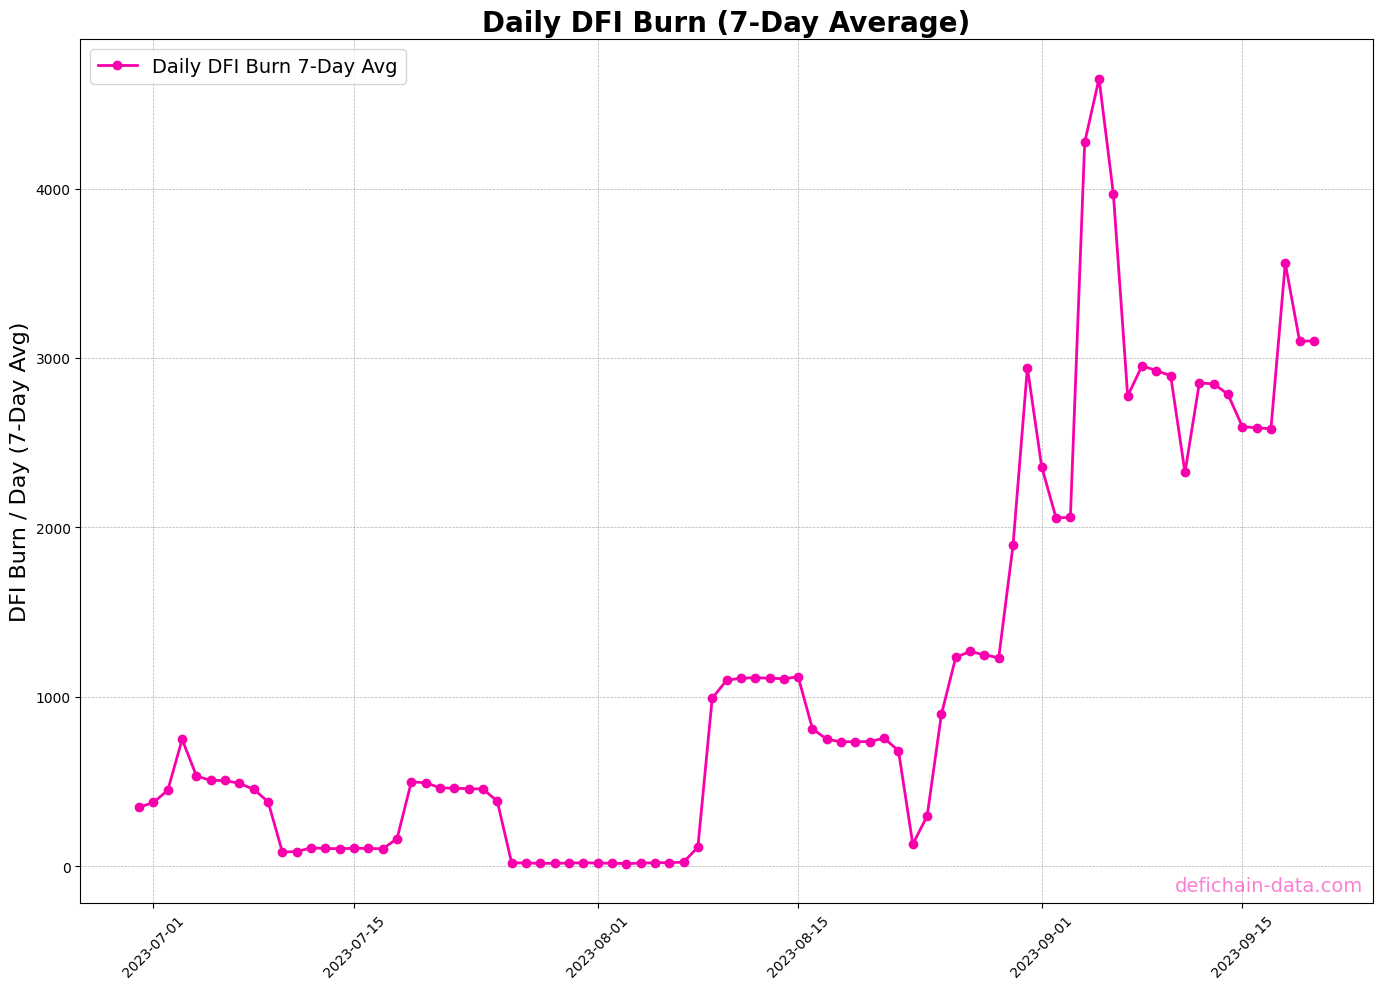

In [13]:
# Plotting Daily 7-day average burn
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['burn_7day_avg'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Burn 7-Day Avg')

axs.set_title('Daily DFI Burn (7-Day Average)', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Burn / Day (7-Day Avg)', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Burn_7day.png', dpi=300)
plt.show()

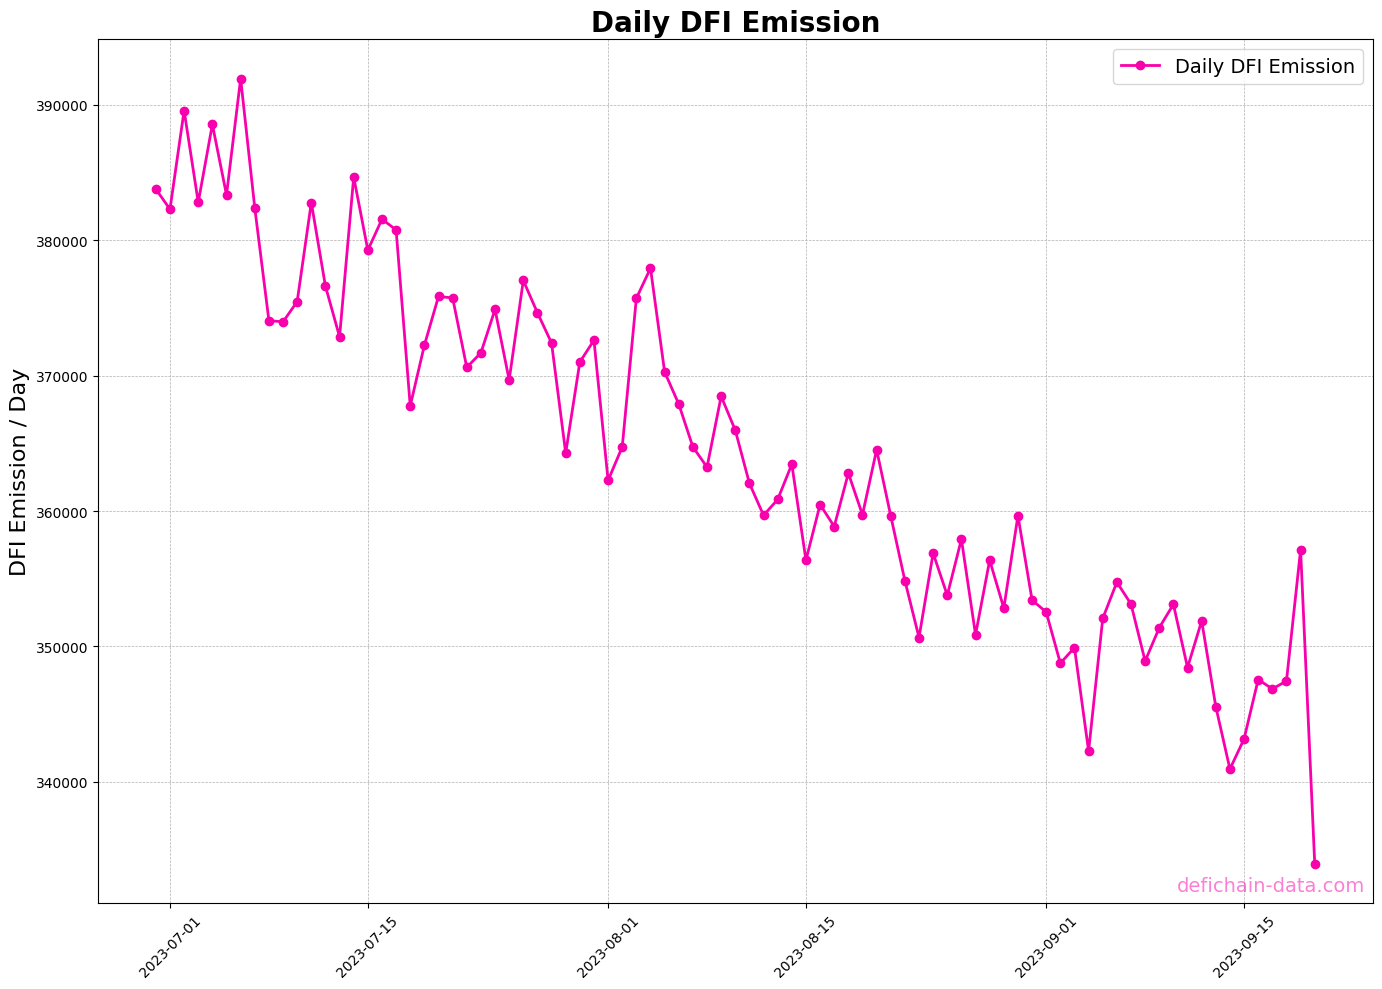

In [14]:
# Plotting Daily Emission
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['emission'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Emission')

axs.set_title('Daily DFI Emission', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Emission / Day', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Emission.png', dpi=300)
plt.show()

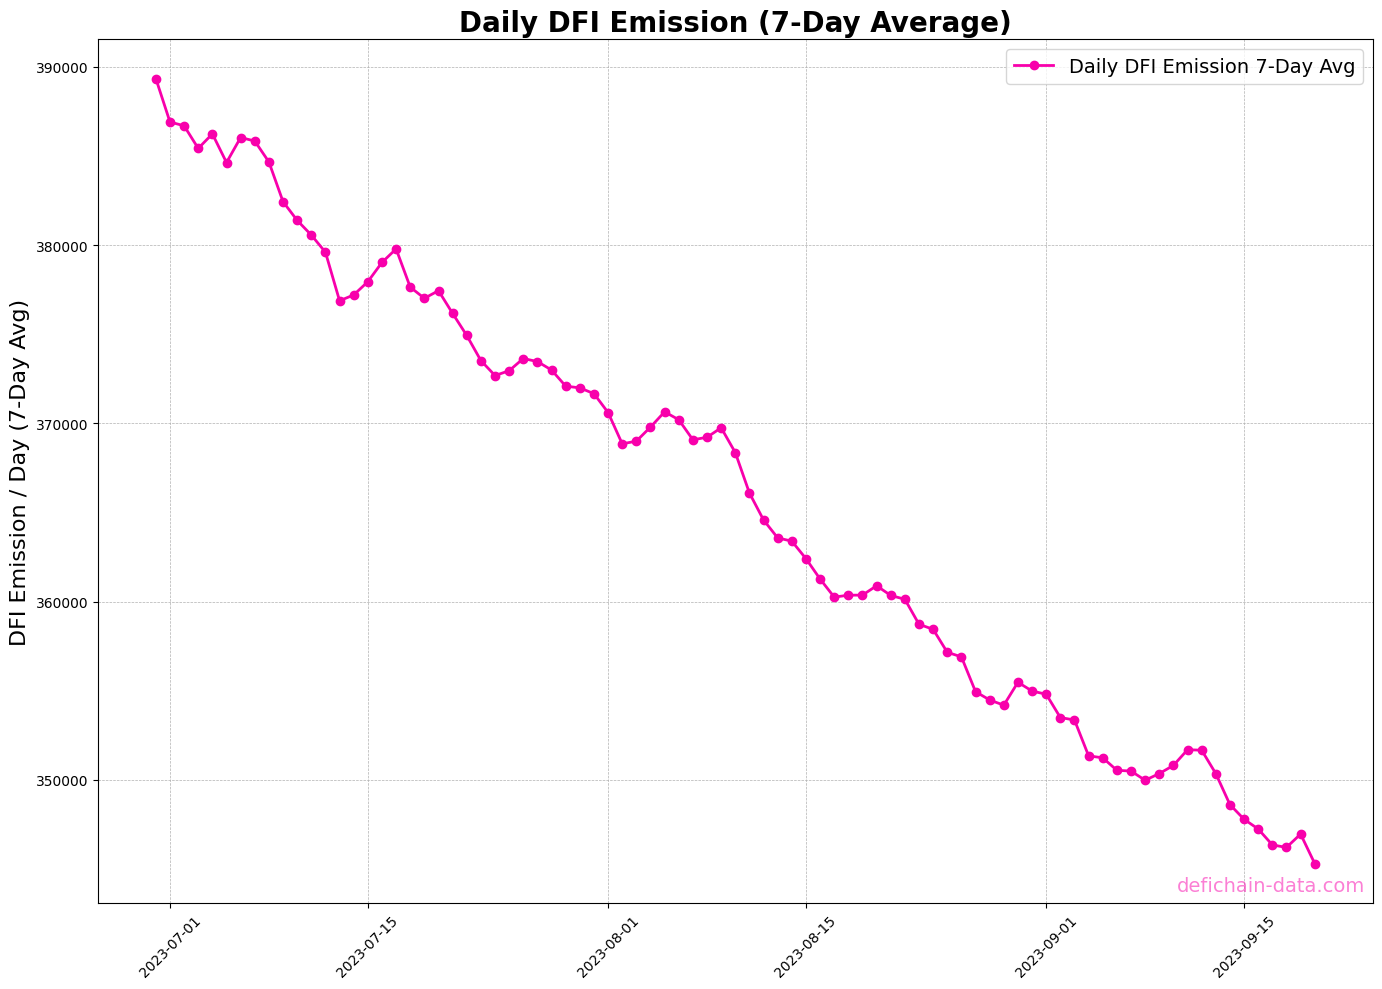

In [15]:
# Plotting Daily 7-Day Avg Emission
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

axs.plot(df['datetime_utc'], df['emission_7day_avg'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Emission 7-Day Avg')

axs.set_title('Daily DFI Emission (7-Day Average)', fontsize=20, fontweight='bold')
axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Emission / Day (7-Day Avg)', fontsize=16)

axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Emission_7day.png', dpi=300)
plt.show()

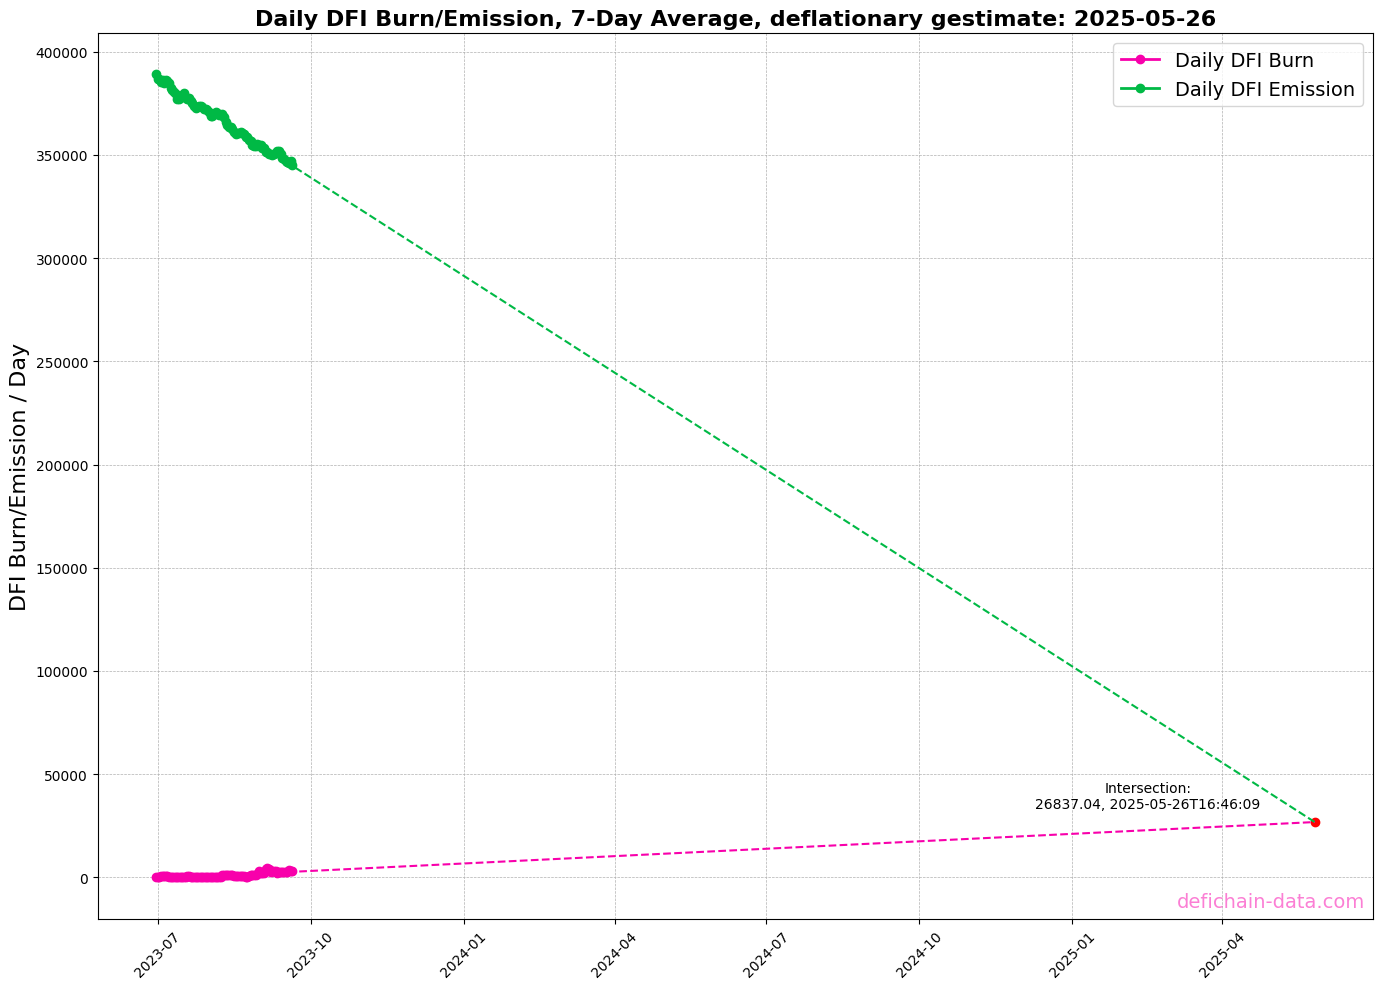

In [16]:
# Plotting Daily Burn/Emission gestimate
import numpy as np
import pandas as pd

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 10))

# Original data
axs.plot(df['datetime_utc'], df['burn_7day_avg'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#F800AB', label='Daily DFI Burn')
axs.plot(df['datetime_utc'], df['emission_7day_avg'], marker='o', linestyle='-', linewidth=2,
         markersize=6, color='#00B945', label='Daily DFI Emission')

# Linear fit for burn
z1 = np.polyfit(pd.to_datetime(df['datetime_utc']).astype('int64'), df['burn_7day_avg'], 1)
p1 = np.poly1d(z1)

# Linear fit for emission
z2 = np.polyfit(pd.to_datetime(df['datetime_utc']).astype('int64'), df['emission_7day_avg'], 1)
p2 = np.poly1d(z2)

# Finding intersection
intersection_x = np.roots(p1 - p2)[0]
intersection_date = pd.to_datetime(intersection_x, unit='ns')
intersection_y = p1(intersection_x)

# Create extended datetime range
min_date = min(pd.to_datetime(df['datetime_utc']).astype('int64'))
max_date = max(pd.to_datetime(df['datetime_utc']).astype('int64'))
extended_range = np.linspace(min_date, max(intersection_x, max_date), 100)

# Plotting extended fit lines
axs.plot(pd.to_datetime(extended_range, unit='ns'), p1(extended_range), linestyle='--', color='#F800AB')
axs.plot(pd.to_datetime(extended_range, unit='ns'), p2(extended_range), linestyle='--', color='#00B945')

# Marking intersection
axs.scatter(intersection_date, intersection_y, color='red')
axs.annotate(f'Intersection:\n{intersection_y:.2f}, {intersection_date.strftime("%Y-%m-%dT%H:%M:%S")}',
             (intersection_date, intersection_y),
             textcoords="offset points",
             xytext=(-120,10),
             ha='center')

# Remaining plot settings
axs.set_title(f'Daily DFI Burn/Emission, 7-Day Average, deflationary gestimate: {intersection_date.strftime("%Y-%m-%d")}', fontsize=16, fontweight='bold')

axs.set_xlabel(None, fontsize=16)
axs.set_ylabel('DFI Burn/Emission / Day', fontsize=16)
axs.grid(which='both', linestyle='--', linewidth=0.5)
axs.legend(fontsize=14)
plt.xticks(rotation=45)

axs.text(0.92, 0.02, 'defichain-data.com', ha='center', va='center', transform=axs.transAxes,
         fontsize=14, color='#F800AB', alpha=0.5)

plt.tight_layout()
plt.savefig('Daily_DFI_Burn_Emission.png', dpi=300)
plt.show()